# 1 Daten laden und erste Darstellung (Selektion, Prüfung)



Die Daten stammen aus dem folgenden Kaggle-Datensatz: https://www.kaggle.com/shree1992/housedata.

Anfangs werden die wichtigsten Klassen geladen, die das Importieren der Daten sowie die Analyse der Daten nach linearer Algebra ermöglichen. Dabei steht das "np" als lineare Algebraklasse von numpy, mit welcher große Arrays gehandhabt werden können. Als Datenverarbeitungsklasse steht "pd", mit welcher Daten verwaltet und analysiert werden können. Zur Datenvisualisierung wird "matplotlib.pyplot" verwendet, hiermit können Tabellen und Diagramme erstellt werden.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_original = pd.read_csv("../datasets/Immobiliendaten.csv")
df = df_original.copy()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

(4600, 18)

Der Datensatz besteht aus 4600 Einträgen mit jeweils 18 Attributen. Kein Wert ist dabei "null", also zu jeder Immobilie sind alle Werte mit angegeben.

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 2 Summary, max-min Tabellen

In [4]:
df.describe(percentiles=[.25, .50, .75, .99]).map(lambda x: f"{x:0.2f}")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
99%,2005220.00,6.00,4.50,5180.10,203455.49,3.00,0.00,4.00,5.00,4460.10,1700.20,2014.00,2014.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


**Interpretation der Werte**

In [14]:
print("Renovierung Jahr == 0: " + str(len(df[df["yr_renovated"] == 0])))
print("Preis == 0: " + str(len(df[df["price"] == 0])))
print("Preis > 10.000.000: " + str(len(df[df["price"] > 10000000])))

Renovierung Jahr == 0: 2705
Preis == 0: 0
Preis > 10.000.000: 0


In [12]:
df = df[df["price"] < 5000000]
df = df[df["price"] != 0]

## Immobilienpreis-Verteilung

<Axes: >

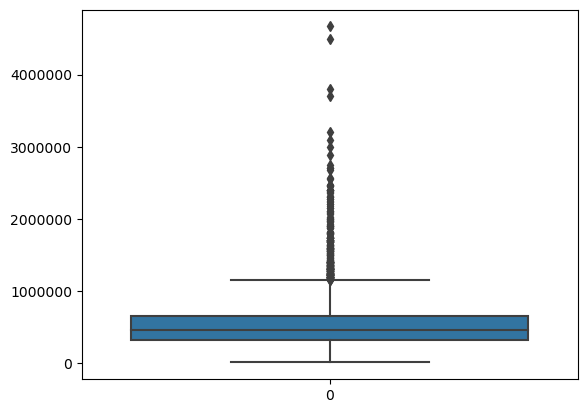

In [13]:
plt.figure(dpi=100)
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["price"])

# 3 Histogramme aller Attribute

Zur Visualisierung werden alle Attribute einmal als Balkendiagramme dargestellt, um einen ersten Eindruck zu erhalten, wie die Verteilung ist.

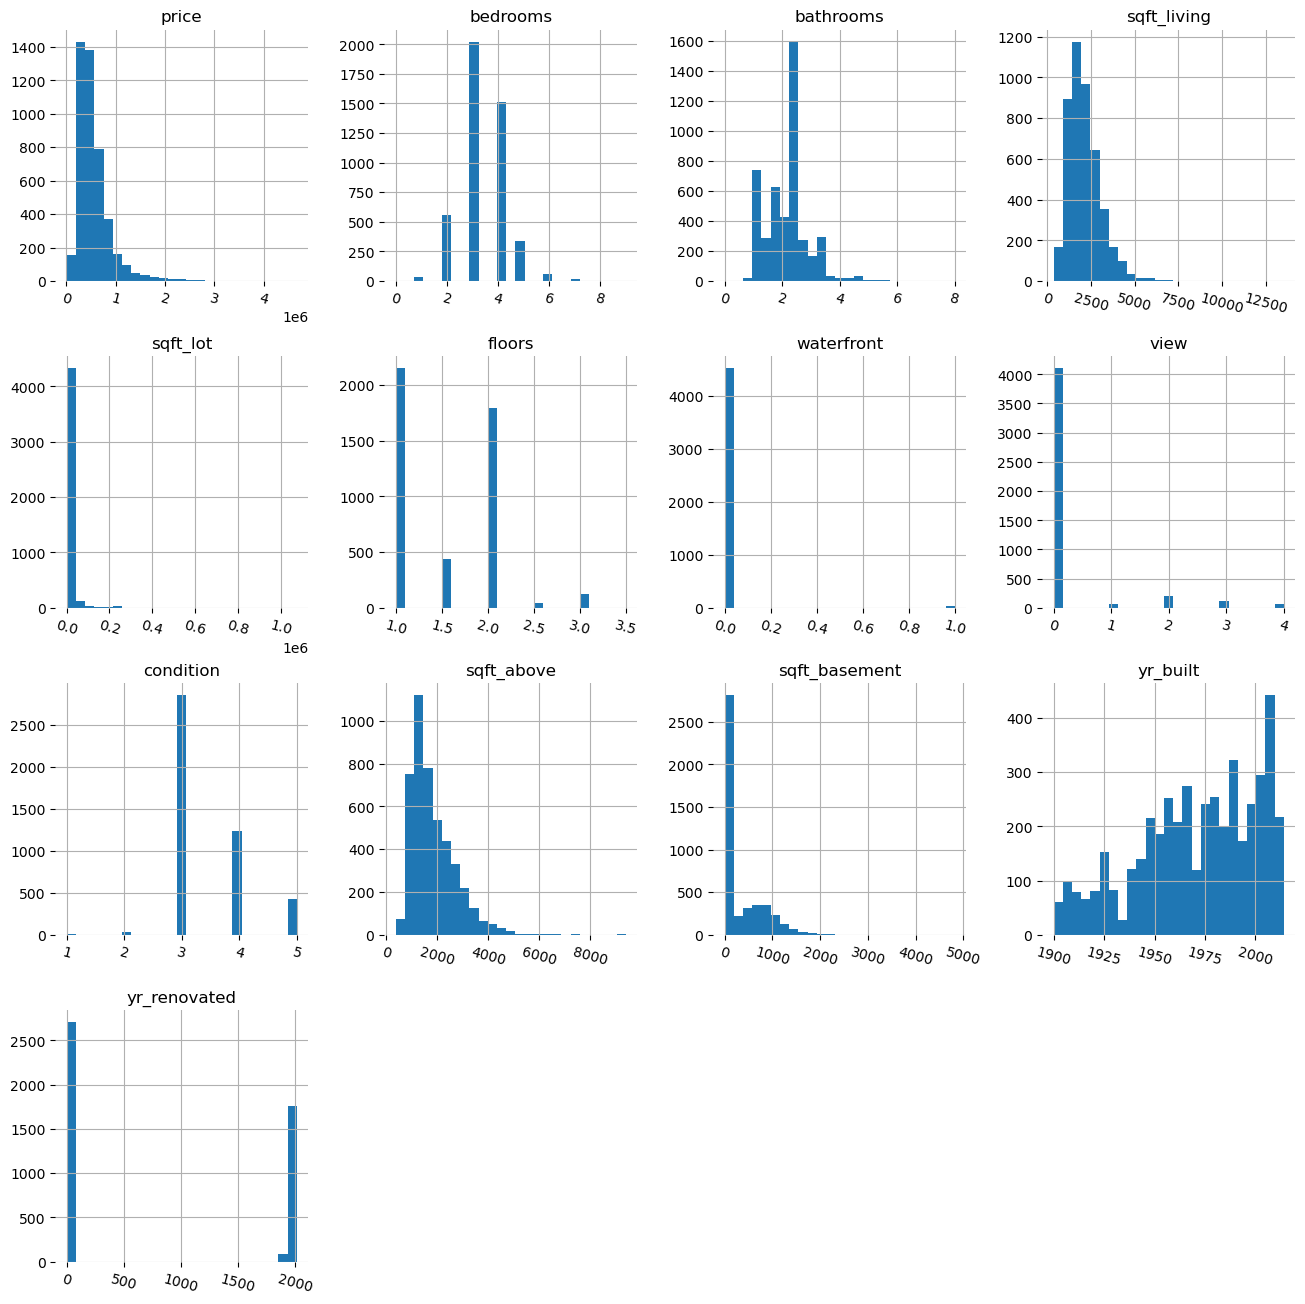

In [21]:
column_list = [col for col in df.columns if col not in ['street', 'city', 'statezip', 'country']]
df1 = df[column_list]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];